In [ ]:
library(tidyverse)
library(ggthemes)
library(hrbrthemes)
library(reshape2)
library(ggtext)

options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)

In [ ]:
df <- read_csv("data.csv")

In [ ]:
df %>%
mutate(year = lubridate::year(date)) %>%
group_by(year, fish_type) %>%
summarize(n = n()) %>%
group_by(year) %>%
mutate(pct = n/sum(n)) %>%
ggplot(aes(x = year, y = pct, fill = fish_type)) +
    geom_bar(stat='identity')

In [ ]:
df %>%
mutate(year = lubridate::year(date)) %>%
group_by(year, position) %>%
summarize(n = n()) %>%
group_by(year) %>%
mutate(pct = n/sum(n)) %>%
ggplot(aes(x = year, y = pct, fill = position)) +
    geom_bar(stat='identity')

In [ ]:
df %>%
mutate(year = lubridate::year(date)) %>%
filter(position == 'Svæði 1') %>%
group_by(year, position_name, position) %>%
summarize(n = n()) %>%
group_by(year) %>%
mutate(pct = n/sum(n)) %>%
ggplot(aes(x = year, y = pct, color = position_name)) +
    geom_point(stat='identity') +
    facet_wrap(~position)

`summarise()` has grouped output by 'year', 'position_number', 'position_name', 'position'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'position', 'position_number', 'position_name'. You can override using the `.groups` argument.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


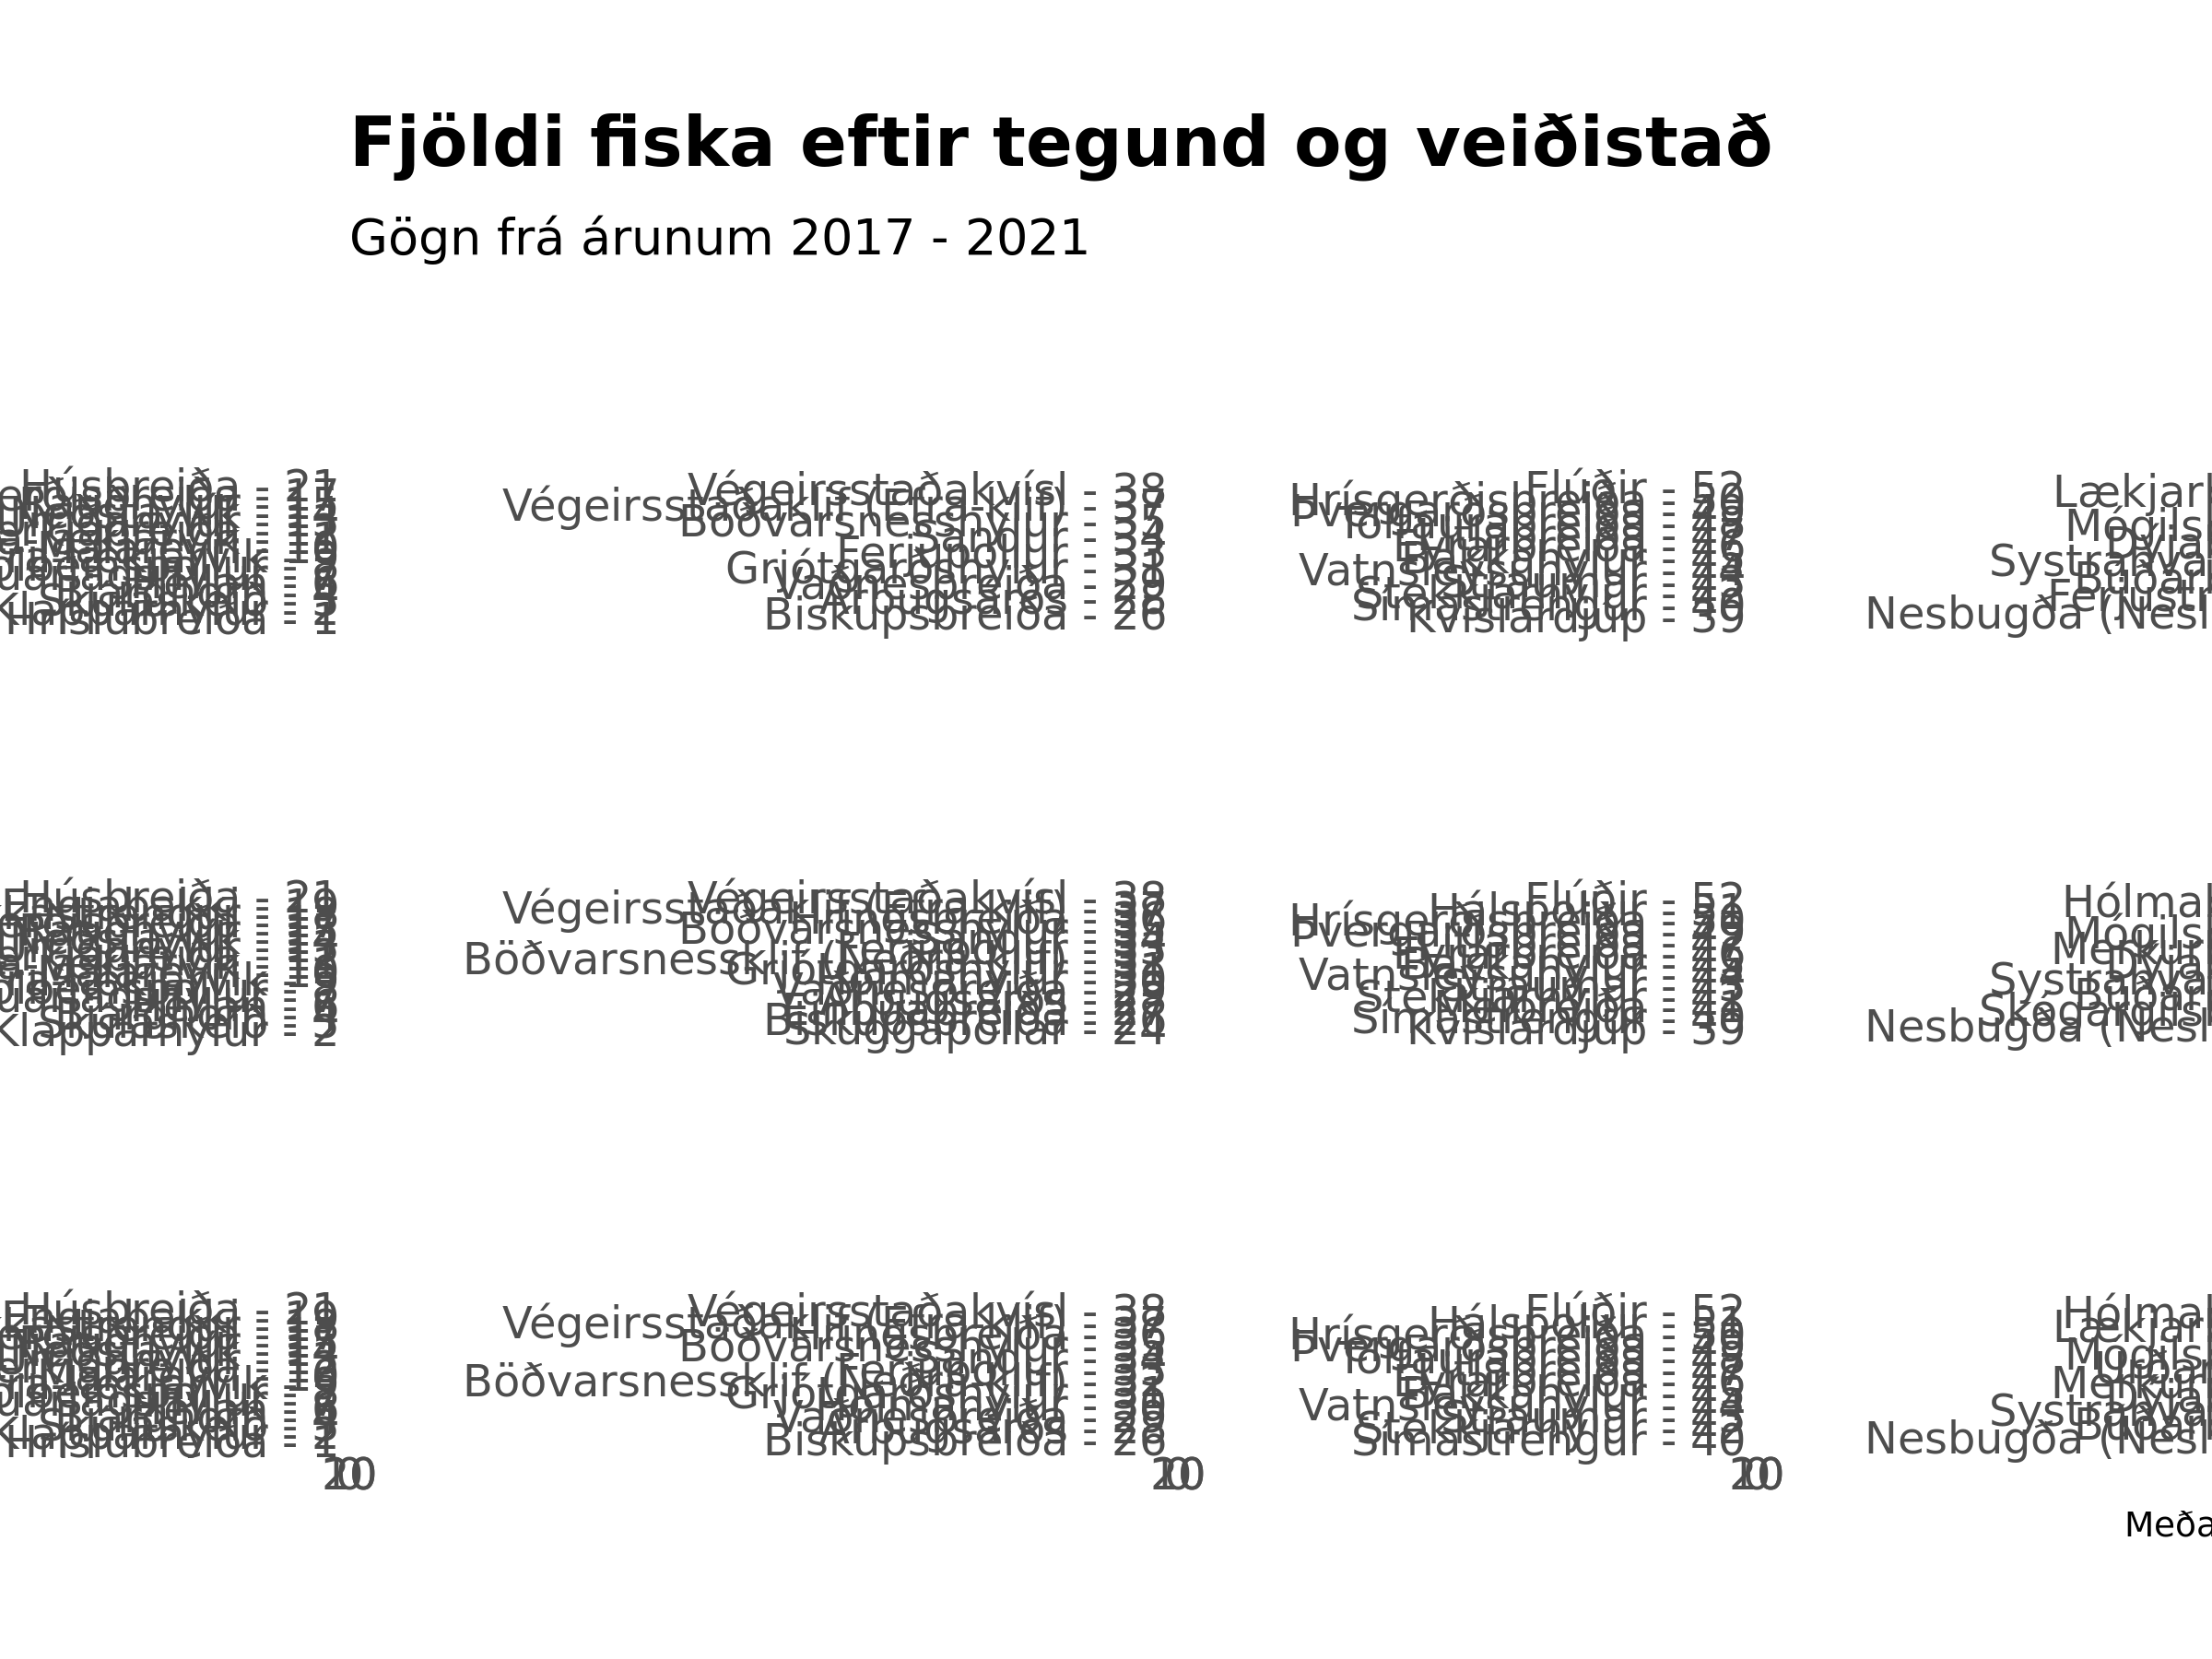

In [7]:
p <- df %>%
mutate(year = lubridate::year(date)) %>%
filter(year >= 2017) %>%
group_by(year, position_number, position_name, position, fish_type) %>%
summarize(n = n()) %>%
group_by(position, position_number, position_name, fish_type) %>%
summarize(pct = mean(n)) %>%
mutate(position_number = as.integer(position_number)) %>%
mutate(position_name = glue::glue("{position_name} - {position_number}")) %>%
mutate(position_name = fct_reorder(position_name, position_number, min)) %>%
ggplot(aes(x = pct, y = position_name, fill = pct)) +
    geom_bar(stat='identity') +
    facet_wrap(~fish_type+position, scale='free_y') +
    hrbrthemes::theme_ipsum_rc() +
    labs(x = 'Meðaltal fiska á ári', y = "", title = "Fjöldi fiska eftir tegund og veiðistað", subtitle = "Gögn frá árunum 2017 - 2021") +
    guides(fill=F)

    
ggsave("average_2017_2021.png", p, width=24, height=16)
p

`summarise()` has grouped output by 'year', 'position_number', 'position_name', 'position'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'position', 'position_number', 'position_name'. You can override using the `.groups` argument.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


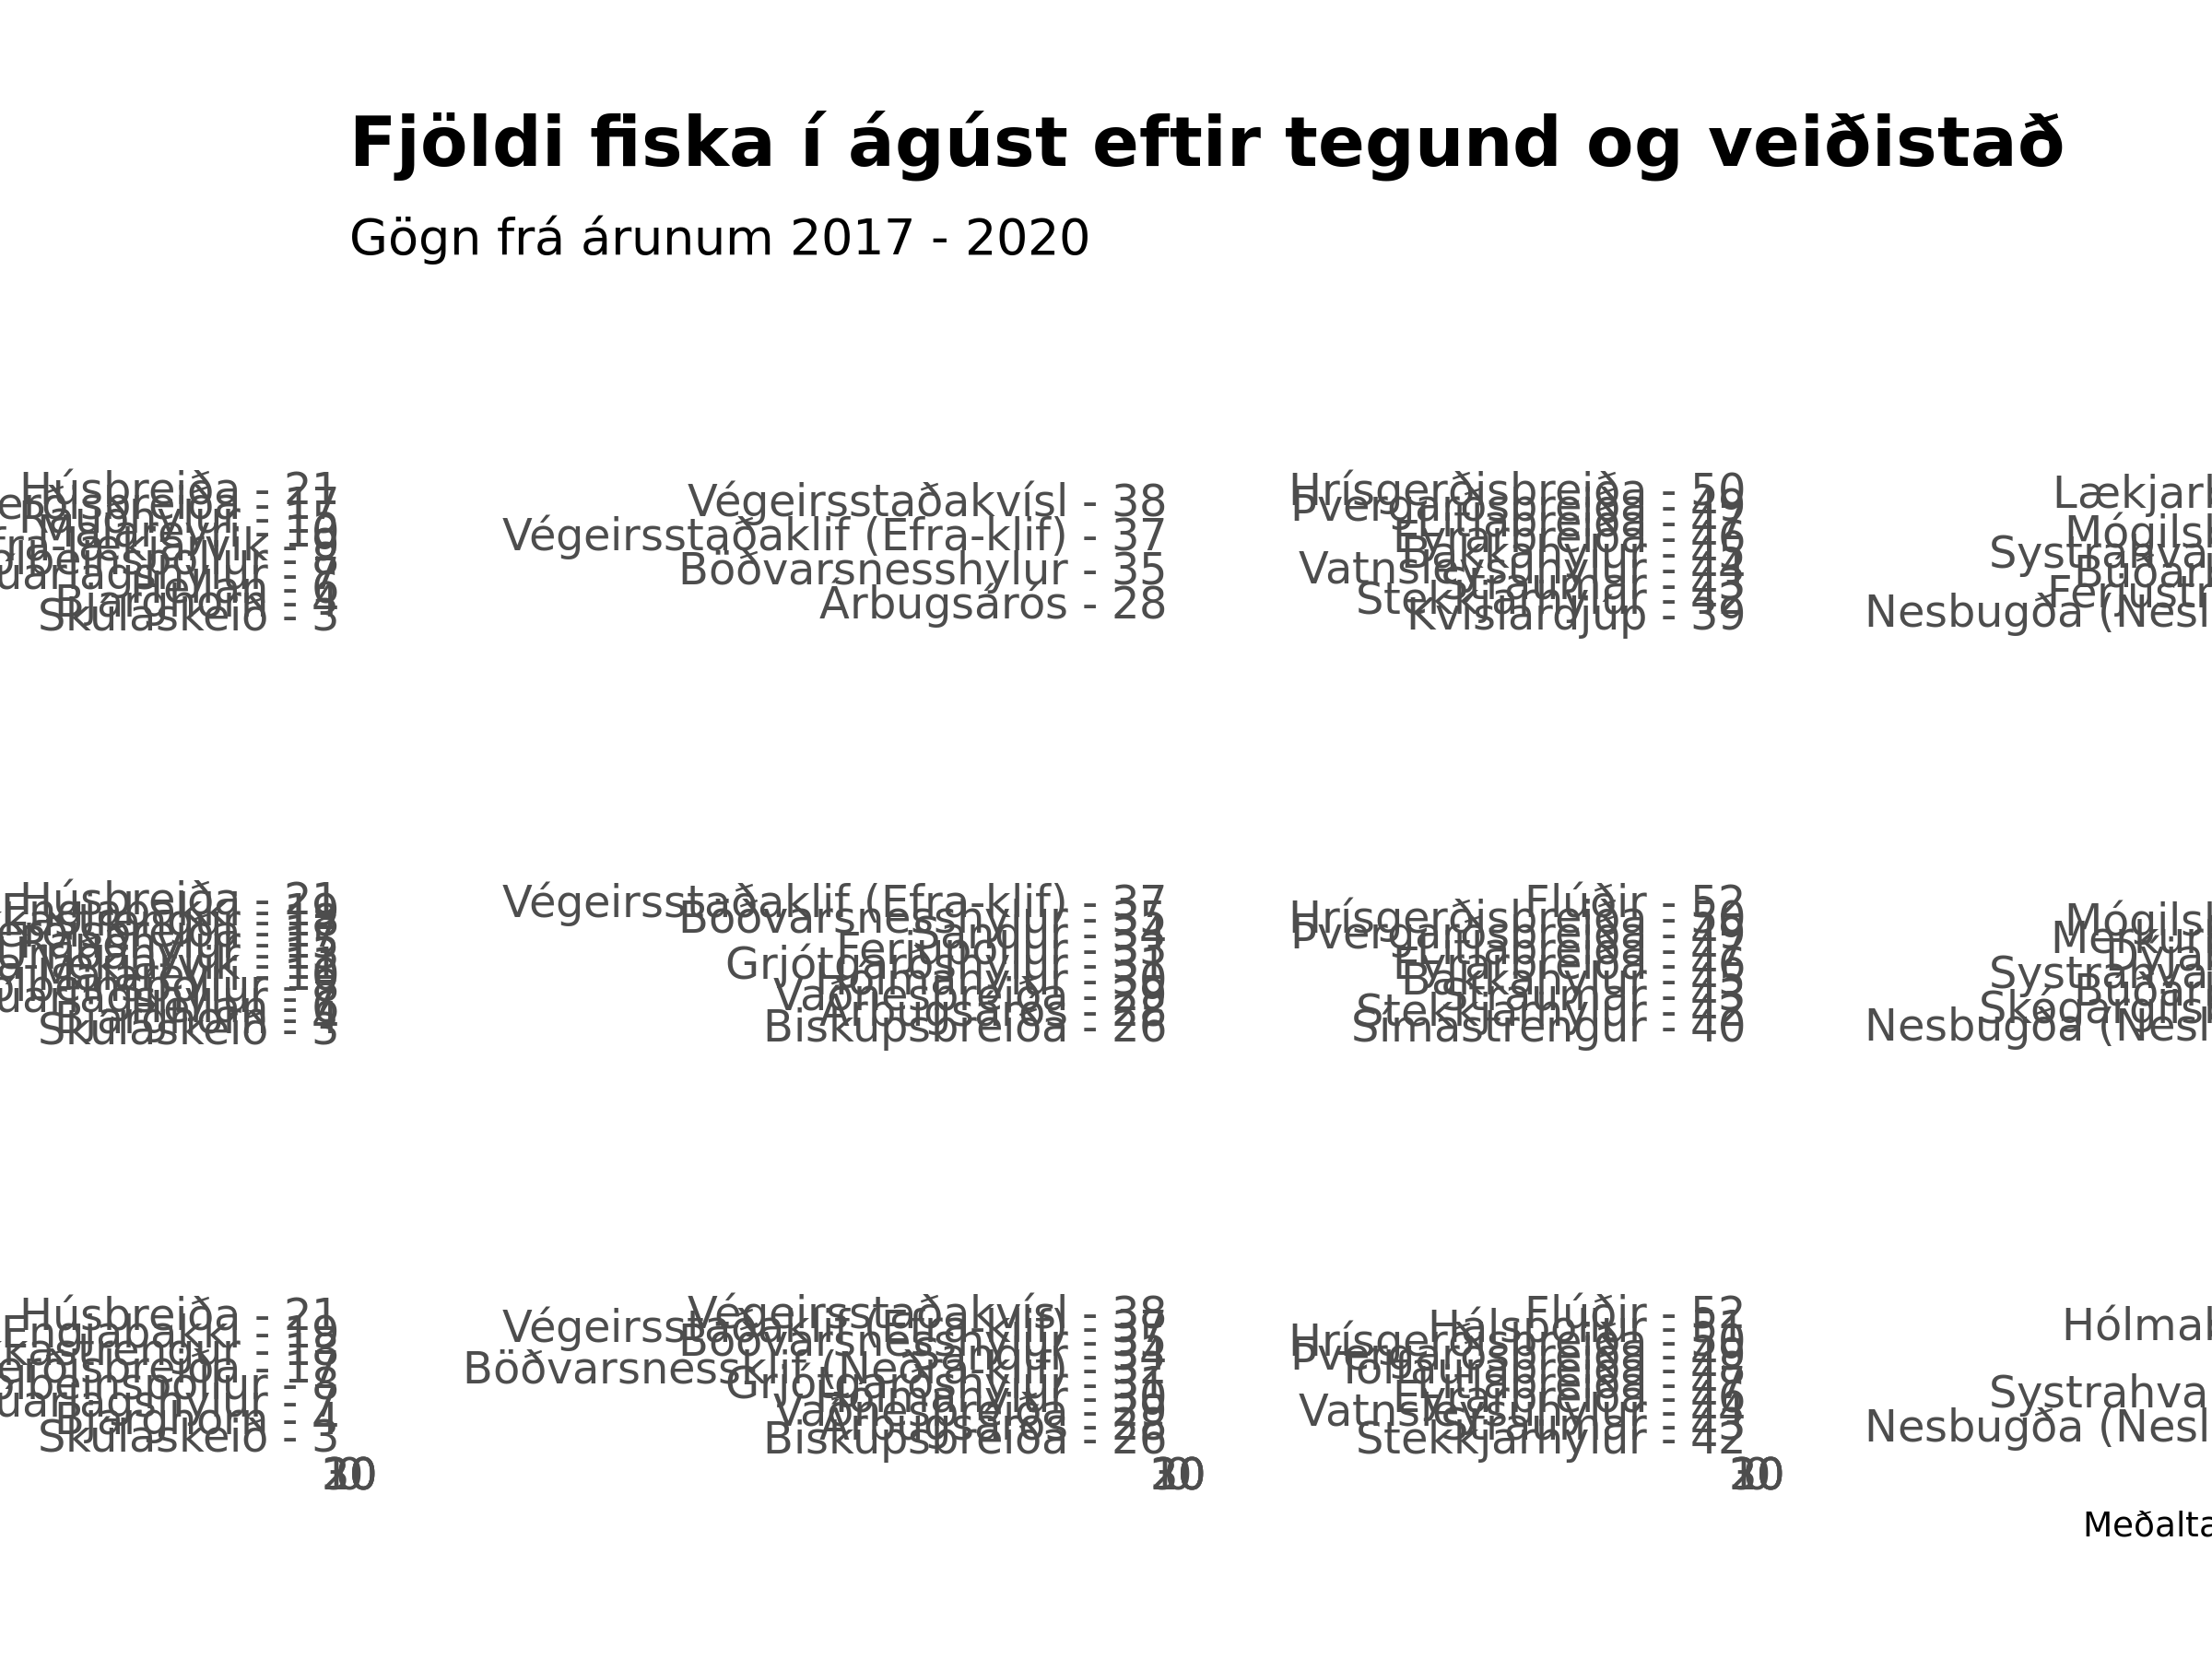

In [8]:
p <- df %>%
mutate(year = lubridate::year(date)) %>%
filter(year >= 2017, year <= 2020) %>%
filter(lubridate::month(date) == 8) %>%
group_by(year, position_number, position_name, position, fish_type) %>%
summarize(n = n()) %>%
group_by(position, position_number, position_name, fish_type) %>%
summarize(pct = mean(n)) %>%
mutate(position_number = as.integer(position_number)) %>%
mutate(position_name = glue::glue("{position_name} - {position_number}")) %>%
mutate(position_name = fct_reorder(position_name, position_number, min)) %>%
ggplot(aes(x = pct, y = position_name, fill = pct)) +
    geom_bar(stat='identity') +
    facet_wrap(~fish_type + position, scale='free_y') +
    hrbrthemes::theme_ipsum_rc() +
    labs(x = 'Meðaltal fiska í ágúst', y = "", title = "Fjöldi fiska í ágúst eftir tegund og veiðistað", subtitle = "Gögn frá árunum 2017 - 2020") +
    guides(fill=F)

    
ggsave("average_aug_2017_2020.png", p, width=24, height=16)
p